<a href="https://colab.research.google.com/github/sweety-12/DeepFake-detection-project/blob/main/Deep_Fake_detection_using_Deep_Learning_model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

**PyTorch Fundamentals:**

What are Tensors really? How they work behind the scenes (storage, strides, views)?

How Autograd (automatic differentiation) works internally.

**Neural Networks in PyTorch:**

Building custom models with nn.Module.

Forward, backward pass, and how optimization (optimizer.step()) is actually happening.

**Advanced Topics:**

Custom loss functions and layers.

Writing custom training loops (instead of using Trainer APIs like PyTorch Lightning etc.).

Mixed Precision Training (for faster training using less memory).

Deployment using TorchScript and ONNX.

Best Practices:

How to manage large codebases with PyTorch (e.g., project structure, data pipelines).

Debugging models, using hooks, visualizing gradients, etc.




**Pytorch:**

Think of it like this:

Analogy	Meaning

PyTorch	-> Like a "factory"

Tensors	-> Like the "raw material"

Models, CNNs -> Like "products" made from that material

Training	-> The "manufacturing process"



1. What is Tensor?

  -> A tensor is basically a multi-dimensional array.

  -> Its like a NumPy array but it can do 3 extra things:
       
       -> It can run on GPU(for speed)
       -> It can track gradients(for learning)
       -> It can be saved/loaded easily in Pytorch models

    Tensors are building blocks of everything in PyTorch.

#2. Creating Tensors

import torch

#create A 1D Tensor
a = torch.tensor([1, 2, 3])

#create a 2D tensor (Matrix)
b = torch.tensor([[1, 2], [3, 4]])
print(b)


#3. Tensor Basics

#Adding two numbers
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])

print(x+y)  


#4. Tensor and GPU
->check if GPU is available

device = torch.device('cuda' if torch.cuda.is_available() else  'cpu')

print(device)


-> Move tensor to GPU

a = a.to(device)
print(a)

#5. Tensors and Gradient
What is Gradient?

Gradient = Slope = How much a function is changing at a point.

It's a rate of change

In deep learning, the model learns by adjusting weights to minimize the loss.


In Pytorch Terms:

When we create a tensor with requires_grad = True,

Pytorch tracks all operations done on it,
so later you can call .backward() an it will automatically compute the gradients.

example:

Create a tensor aand ask it to track gradients

x = torch.tensor(2.0, requires_grad = True)

Define a function based on x

y = x^2 + 3*x + 4

Compute the gradient(backward pass)

y.backward()

now x.grad contains the gradient of y with respect to x

print(x.grad)

📌 Why do we care about Gradients?

   Without gradients, models won't learn.






#What is Autograd?

In Pytorch, Autograd is the system that automatically calculates gradients for you.
Instead of manually applyling calculas

Pytorch builds a dynamic computation graph behind the scenes.

#💬 Everyday analogy:
Imagine you're baking a cake.

Every step (add flour, add sugar, mix) is recorded.

At the end, you want to figure out:

"If I added slightly more flour, how would it change the cake?"

Autograd remembers every step and tells you how the final cake would change if you tweaked anything.

#🏆 You have now understood:
Real model structure

Forward pass

Loss computation

Backward pass (Autograd)



#Next natural topics in PyTorch are:

#📚 Next Topics:
Step	Topic	Why important?

1	Common Layers (Linear, Conv2d, ReLU, etc.)	You need these to design any neural network

2	Loss Functions	-> To calculate "how wrong" model is

3	Optimizers	-> To update model weights based on gradients

4	Training Loop -> 	To train the model on real data

5	Dataset and Dataloader	-> To feed data into the model in batches



#Common Layers in PyTorch

1. nn.linear

Used for fully connected layers

2. nn.Conv2d

Used for image processing(CNN). Instead of matrix multiplication, it slides small filters over images.

3. Activation functions

After a layer, you usually apply activation to introduce non-linearity.



















#📚 Let's start: Loss Functions in PyTorch
#Step 1: What is a Loss Function?
✅ A loss function tells us:

How wrong is our model's prediction compared to the actual target?

🎯 Why Loss Function is needed?
Without loss, model won't know:

Are we doing good?

Should we adjust weights?

How to adjust them?

✅ Loss = signal for learning.

#Step 2: Types of Loss Functions
    Loss Function	             Used For	                    PyTorch Class
    Mean Squared Error (MSE)	   -> Regression (predicting numbers)	   -> nn.MSELoss()
    Cross Entropy Loss	 ->  Classification (predicting classes)         ->  nn.CrossEntropyLoss()
    Binary Cross Entropy	-> Binary classification (2 classes only)	-> nn.BCELoss()



    

#Step 1: What is an Optimizer?
✅ An Optimizer is responsible for:

Updating model weights based on the gradients calculated during .backward()

✅ After .backward(), we have gradients —
But who actually changes the weights?
👉 Optimizer!


#Step 2: Most Common Optimizers
    Optimizer	    When to use	    PyTorch Class
    SGD (Stochastic Gradient Descent)	 Simple models	torch.optim.SGD
    Adam (Adaptive Moment Estimation)	Deep Learning, CNNs, NLP	torch.optim.Adam

✅ Adam is default choice for most Deep Learning today because it’s faster and smarter.


    optimizer = optim.Adam(model.parameters(), lr=0.001)


🧠 IMPORTANT: Why optimizer.zero_grad()?
✅ Because PyTorch accumulates gradients by default (adds them up),
✅ So you need to clear old gradients before next batch training.

Otherwise gradients would keep adding up batch after batch — model would go crazy 😵‍💫.


#✅ This is the skeleton of training any deep learning model!

```
for epoch in range(num_epochs):
    for batch in dataloader:
        inputs, targets = batch
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        loss.backward()      # calculate gradients
        optimizer.step()      # update weights
        optimizer.zero_grad() # clear gradients
```










#📚 Start: Training Loop in PyTorch
#🎯 Why Training Loop is needed?
✅ Training Loop = Process where the model learns from data again and again (in multiple epochs) until it gets smart.

✅ It repeats the steps:

Predict → Calculate Loss → Backward Pass → Update Weights

#📦 Now Quickly: What is Dataloader?
✅ Dataloader = Feeds batches of data into model.

✅ Instead of giving entire data at once (which is slow and memory heavy),
we give small parts → batch_size.

✅ Comes from:

    from torch.utils.data import DataLoader


example

    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


✅ This will give batches of 32 samples at a time.







# 🏆 FULL SIMPLE Example Bringing Everything Together:



```
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 1. Dummy dataset
X = torch.randn(100, 10)  # 100 samples, 10 features
y = torch.randint(0, 2, (100,))  # 100 labels (0 or 1)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 2. Model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 2)

    def forward(self, x):
        return self.fc(x)

model = SimpleModel()

# 3. Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

```







# **Setting up Coding Environment**

In [ ]:
#install necessary packages
!pip install -q torch torchvision torchaudio   #pytorch for buildidng and training models
!pip install -q matplotlib scikit-learn opencv-python   #for plotting and image handling
!pip install -q albumentations tqdm    #for data augmentation and progress bars



   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 219.9/363.4 MB 186.3 MB/s eta 0:00:01

**Import Libraries**

In [ ]:
#pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

#other libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm


# ✅ 1. torchvision.transforms
# 🔍 What is it for?
# 👉 transforms is used to preprocess your images before feeding them into your CNN model.
# CNNs work best when:
# All images are same size
# Pixel values are normalized
# Images are converted to tensors (PyTorch doesn’t work with raw NumPy images)


# ✅ 2. os (Python standard library)
# 🔍 What is it for?
# 👉 This is a standard Python module for interacting with the file system — like creating folders, listing files, joining paths.

# os.path.join('folder', 'file.jpg')   # Safely joins paths
# os.listdir('images/')                # Lists all files in a directory
# os.makedirs('output/')


# ✅ 3. tqdm
# 🔍 What is it for?
# 👉 tqdm is used to show a progress bar while looping over a dataset or training loop.



**Dataset Collection**

Get a dataset that contains both real and fake images for training your model

we will use the fake and reak faces dataset for easier and fater training at the start.

In [ ]:
from google.colab import files
files.upload()  #upload the kaggle.json file here

Authenticate and Download Dataset

In [ ]:
#save the key and download the dataset
!mkdir -p ~/.kaggle    #-p means create folder only if does not exists
!cp kaggle.json ~/.kaggle/   # line means copy the API key in kaggle.jason file inside directory
!chmod 600 ~/.kaggle/kaggle.json  #change the file permission, only readable and writable by me.

#Download the fake and real dataset(small and good for starters)
!kaggle datasets download -d ciplab/real-and-fake-face-detection
!unzip -q real-and-fake-face-detection.zip -d data

**Data Preprocessing and DataLoader Creation**

This step will prepare the image so your model can understand and learn from them

#What is data Augmentation?

In simpler terms: You're creating new versions of your training images by slightly modifying the original ones — like flipping, rotating, zooming, etc.


🤔 Why do we augment data?
Because real-world data is:

Limited

Biased

Noisy

Not varied enough


#🔥 Why is it especially useful in DeepFake detection?
✅ Because fake faces may:

Appear in different lighting

Be flipped/mirrored

Be slightly rotated or distorted

In [ ]:
from PIL import Image
#These help standardize and augment the input data

from torchvision import transforms

transform = transforms.Compose([
    transforms.Lambda(lambda image: image.convert('RGB')),  #Convert all images to RGB
    transforms.Resize((128, 128)),   #Resize all images to 128x128
    transforms.ToTensor(),            #Convert to PyTorch tensor(0-1 range)
    transforms.Normalize(mean = [0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  #Normalize to [-1, 1]
])

**Load Dataset using ImageFolder**

Imagefolder automatically labels folders real - 0, fake - 1.

In [1]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

#load dataset
dataset = ImageFolder("data/real_and_fake_face", transform=transform)

#split into train and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

#create DataLoaders(batch size = 32)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 32, shuffle = False)

#check classes
print("Classes:", dataset.classes)  #['fake', 'real']  // assignes classes fake - 0 ,real -1



#📦 What ImageFolder does:
# It automatically:
# Reads image files from a directory
# Assigns labels based on folder names
# Applies transformations you provide (like resize, normalize, flip, etc.)
# Converts them into PyTorch tensors
# Makes them ready for a DataLoader

# 🧠 Why is ImageFolder so useful?
# ✅ You don’t have to manually load, label, or convert images
# ✅ Automatically organizes everything based on folder names
# ✅ Works seamlessly with DataLoader, random_split, etc.





NameError: name 'transform' is not defined

Visualize Sample Images

In [ ]:
def show_batch(loader):
  images, labels = next(iter(loader))
  fig, ax = plt.subplots(1, 5, figsize=(15, 3))
  for i in range(5):
    img = images[i].permute(1,2, 0)* 0.5 + 0.5  #undo normalization
    label = "Real" if labels[i] == 1 else "Fake"
    ax[i].imshow(img)
    ax[i].set_title(label)
    ax[i].axis('off')


show_batch(train_loader)

#What this code actually doing is, picking any 5 images-> de-normalizing it,
#cheking if it real or fake ->and displaying it with labels


# Build the Deep Fake Detection Model

Create a Convolutional Neural Network(CNN) that learns to classify images as real(1) or fake (0)

**Define a Simple CNN Architecture**

we'll keep it simple to start with and later i can experiment with advanced models and ResNet, Efficient, or Xception

In [ ]:
class DeepFakeCNN(nn.Module):   #through nn.Module creating my custom model
  def __init__(self):
    super(DeepFakeCNN, self).__init__()    #__init__: Constructor — Define layers here
    self.conv1 = nn.Conv2d(3, 16, kernel_size =3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.dropout = nn.Dropout(0.3)
    self.fc1 = nn.Linear(64 * 16 * 16, 128)   #128 hidden layers
    self.fc2 = nn.Linear(128, 1)    #1 output


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 64 * 16 * 16)
    x = self.dropout(F.relu(self.fc1(x)))
    x = torch.sigmoid(self.fc2(x))   #Sigmoid activation gives probability between 0 and 1, Perfect for binary output (fake vs real)
    return x

**Initialize Model, Loss and Optimizer**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepFakeCNN().to(device)

#Binary classification = use BCE Loss
criterion = nn.BCELoss()

#Adam optimizer(you can experiment later)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**Training Function**

Here we'll loop over epochs, update weights and print training loss.

In [ ]:
def train(model, loader, optimizer, criterion):
  model.train()
  running_loss = 0.0
  for images, labels in tqdm(loader):
    images, labels = images.to(device), labels.float().to(device)
    labels = labels.view(-1, 1)  #Reshape for BCE loss

    #Forward + Backward + Optimize
    outputs = model(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  return running_loss / len(loader)

**Validation Function**

to evaluate how well the model performs on unseen data

In [ ]:
def evaluate(model, loader, criterion):
  model.eval()
  total_loss = 0.0
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in loader:
      images, labels = images.to(device), labels.float().to(device)
      labels = labels.view(-1,1)
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item()

      predicted = (outputs > 0.5).float()
      correct += (predicted == labels).sum().item()
      total += labels.size(0)
    return total_loss / len(loader), correct / total

**Train the Model**

In [ ]:
num_epochs = 20
for epoch in range(num_epochs):
  train_loss = train(model, train_loader, optimizer, criterion)
  val_loss, val_acc = evaluate(model, val_loader, criterion)
  print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

100%|██████████| 51/51 [00:16<00:00,  3.02it/s]


Epoch 1/20 - Train Loss: 0.5903, Val Loss: 0.6422, Val Acc: 0.6381


100%|██████████| 51/51 [00:16<00:00,  3.03it/s]


Epoch 2/20 - Train Loss: 0.5492, Val Loss: 0.6791, Val Acc: 0.6161


100%|██████████| 51/51 [00:17<00:00,  2.91it/s]


Epoch 3/20 - Train Loss: 0.4894, Val Loss: 0.7038, Val Acc: 0.6479


100%|██████████| 51/51 [00:17<00:00,  2.98it/s]


Epoch 4/20 - Train Loss: 0.4306, Val Loss: 0.7361, Val Acc: 0.6357


100%|██████████| 51/51 [00:16<00:00,  3.03it/s]


Epoch 5/20 - Train Loss: 0.3603, Val Loss: 0.8619, Val Acc: 0.6064


100%|██████████| 51/51 [00:16<00:00,  3.01it/s]


Epoch 6/20 - Train Loss: 0.2766, Val Loss: 1.1366, Val Acc: 0.5966


100%|██████████| 51/51 [00:17<00:00,  2.93it/s]


Epoch 7/20 - Train Loss: 0.2076, Val Loss: 1.2110, Val Acc: 0.6039


100%|██████████| 51/51 [00:16<00:00,  3.05it/s]


Epoch 8/20 - Train Loss: 0.1481, Val Loss: 1.2851, Val Acc: 0.5917


100%|██████████| 51/51 [00:16<00:00,  3.06it/s]


Epoch 9/20 - Train Loss: 0.1185, Val Loss: 1.3849, Val Acc: 0.5868


100%|██████████| 51/51 [00:17<00:00,  2.95it/s]


Epoch 10/20 - Train Loss: 0.0941, Val Loss: 1.8863, Val Acc: 0.6015


100%|██████████| 51/51 [00:17<00:00,  2.90it/s]


Epoch 11/20 - Train Loss: 0.0639, Val Loss: 3.0941, Val Acc: 0.5941


100%|██████████| 51/51 [00:16<00:00,  3.05it/s]


Epoch 12/20 - Train Loss: 0.0796, Val Loss: 2.2452, Val Acc: 0.5917


100%|██████████| 51/51 [00:16<00:00,  3.04it/s]


Epoch 13/20 - Train Loss: 0.0559, Val Loss: 2.0898, Val Acc: 0.6039


100%|██████████| 51/51 [00:17<00:00,  2.91it/s]


Epoch 14/20 - Train Loss: 0.0760, Val Loss: 2.0548, Val Acc: 0.5844


100%|██████████| 51/51 [00:17<00:00,  2.96it/s]


Epoch 15/20 - Train Loss: 0.0431, Val Loss: 3.1196, Val Acc: 0.6039


100%|██████████| 51/51 [00:16<00:00,  3.04it/s]


Epoch 16/20 - Train Loss: 0.0365, Val Loss: 3.2790, Val Acc: 0.5770


100%|██████████| 51/51 [00:16<00:00,  3.01it/s]


Epoch 17/20 - Train Loss: 0.0214, Val Loss: 4.1656, Val Acc: 0.6039


100%|██████████| 51/51 [00:17<00:00,  2.89it/s]


Epoch 18/20 - Train Loss: 0.0350, Val Loss: 3.4155, Val Acc: 0.5770


100%|██████████| 51/51 [00:17<00:00,  2.99it/s]


Epoch 19/20 - Train Loss: 0.0249, Val Loss: 3.4851, Val Acc: 0.5892


100%|██████████| 51/51 [00:16<00:00,  3.03it/s]


Epoch 20/20 - Train Loss: 0.0102, Val Loss: 4.4306, Val Acc: 0.6088


**Evaluate and Testing the Deepfake detector**

Goal
Evaluate model performance on validation data
visualize predictions
Generate metrics like accuracy, confusion matrix, precision, and recall

Predict and visualize on sample images

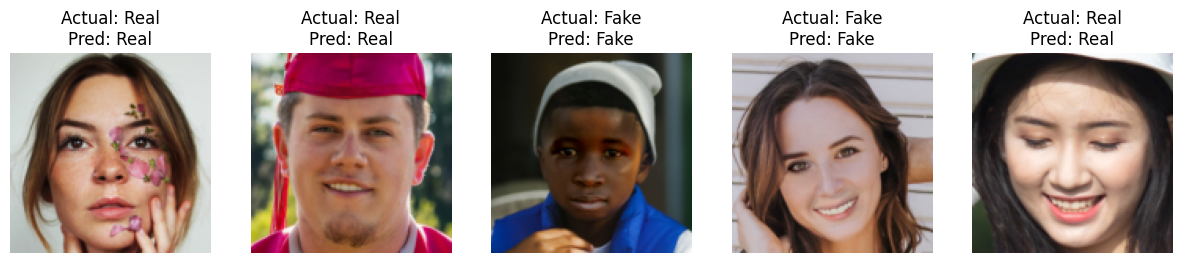

In [ ]:
def predict_and_show(model, loader):
  model.eval()
  images, labels = next(iter(loader))
  images, labels = images.to(device), labels.to(device)

  outputs = model(images)
  preds = (outputs > 0.5).int()

  fig, ax = plt.subplots(1, 5, figsize = (15, 3))
  for i in range(5):
    img = images[i].cpu().permute(1, 2, 0) * 0.5 + 0.5
    actual = "Real" if labels[i] == 1 else "Fake"
    predicted = "Real" if preds[i] == 1 else "Fake"
    ax[i].imshow(img)
    ax[i].set_title(f"Actual: {actual}\nPred: {predicted}")
    ax[i].axis('off')

predict_and_show(model, val_loader)

**Evaluation Metrics**

Let's compute accuracy, precision, recall and confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def evaluate_metrics(model, loader):
  model.eval()
  all_preds = []
  all_labels = []

  with torch.no_grad():
    for images, labels in loader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      preds = (outputs > 0.5).int().cpu().numpy()
      all_preds.extend(preds)
      all_labels.extend(labels.cpu().numpy())

    #convert to numpy
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    #Metrics
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds)
    rec = recall_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print("Confusion Matrix:\n", cm)

evaluate_metrics(model, val_loader)


Accuracy: 0.6088
Precision: 0.6489
Recall: 0.5648
Confusion Matrix:
 [[127  66]
 [ 94 122]]


**Test on Your Own image(Real or Fake)**

In [ ]:
#this cell is used tp upload an image
from google.colab import files
uploaded = files.upload()

Saving fake3.jpg to fake3 (1).jpg


In [ ]:
from PIL import Image

def predict_image(image_path, model):
  model.eval()
  img = Image.open(image_path).convert('RGB')
  img = transform(img)  #use the same transform as training
  img = img.unsqueeze(0).to(device)  #Add batch dimension

  with torch.no_grad():
    output = model(img)
    prediction = (output > 0.5).int().item()


  label = "Real" if prediction == 1 else "Fake"
  print(f"Prediction: {label}")

  #show image
  plt.imshow(Image.open(image_path))
  plt.title(f"Prediction: {label}")
  plt.axis('off')
  plt.show()


Prediction: Real


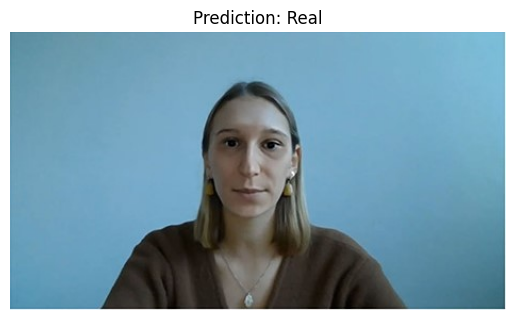

In [ ]:
predict_image("fake3.jpg", model)